In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"F:\DS\ASSIGNMENTS\Assignment 5\titanic_dataset.csv", index_col = 'PassengerId')

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 11)

In [5]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
for i in['Age']: 
    data[i] = data[i].fillna(data[i].median())

In [7]:
data = data.drop(['Cabin', 'Embarked'], axis = 1)

In [8]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

In [9]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500


# HANDLING OF OUTLIERS

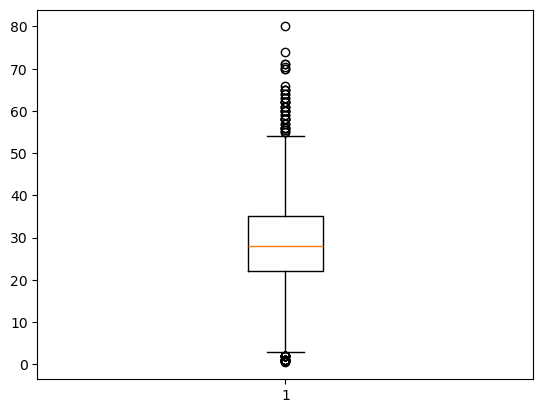

In [10]:
plt.boxplot(data['Age'])
plt.show()

In [11]:
Q1 = np.percentile(data['Age'],25)

In [12]:
Q3 = np.percentile(data['Age'],75)

In [13]:
IQR = Q3 - Q1

In [14]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [15]:
lower_limit

2.5

In [16]:
upper_limit

54.5

In [17]:
outlier =[]
for x in data['Age']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)

In [18]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [19]:
ind = data['Age']>upper_limit
data.loc[ind].index

Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253, 269,
       276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546, 556, 571,
       588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773, 830, 852, 880],
      dtype='int64', name='PassengerId')

In [20]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253, 269,
       276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546, 556, 571,
       588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773, 830, 852, 880], inplace = True)

In [21]:
data.shape

(849, 9)

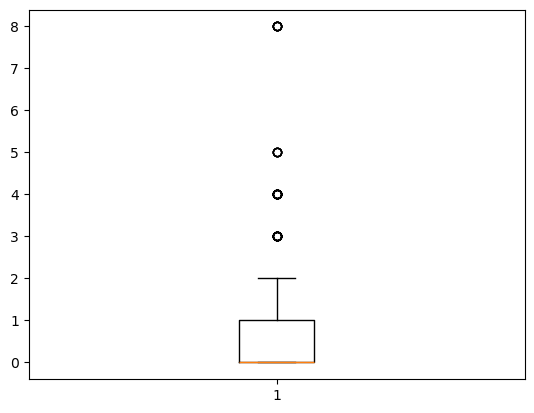

In [22]:
plt.boxplot(data['SibSp'])
plt.show()

In [23]:
Q1 = np.percentile(data['SibSp'],25)
Q3 = np.percentile(data['SibSp'],75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [24]:
lower_limit

-1.5

In [25]:
upper_limit

2.5

In [26]:
outlier =[]
for x in data['SibSp']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)

In [27]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [28]:
ind = data['SibSp']>upper_limit
data.loc[ind].index

Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160, 165,
       172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 387,
       410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788, 793, 814, 820,
       825, 847, 851, 864],
      dtype='int64', name='PassengerId')

In [29]:
data.drop([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160, 165,
       172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 387,
       410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788, 793, 814, 820,
       825, 847, 851, 864], inplace = True)

In [30]:
data.shape

(803, 9)

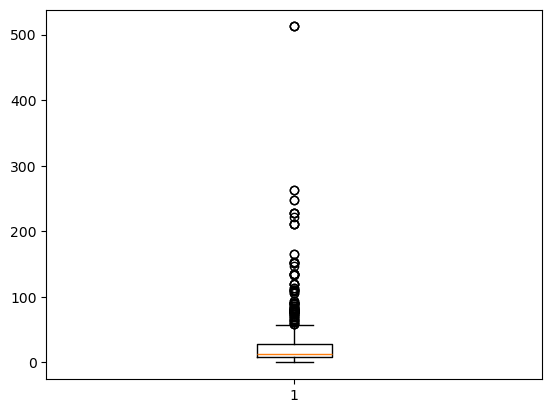

In [31]:
plt.boxplot(data['Fare'])
plt.show()

In [32]:
Q1 = np.percentile(data['Fare'],25)
Q3 = np.percentile(data['Fare'],75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [33]:
lower_limit

-21.997999999999998

In [34]:
upper_limit

57.7188

In [35]:
outlier =[]
for x in data['Fare']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)

In [37]:
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 61.175,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 61.3792,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 83.1583,
 89.1042,
 164.8667]

In [38]:
ind = data['Fare']>upper_limit
data.loc[ind].index

Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
       ...
       760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
      dtype='int64', name='PassengerId', length=104)

In [40]:
ind

PassengerId
1      False
2       True
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Fare, Length: 803, dtype: bool

# MIN MAX SCALING

In [41]:
x = data.drop('Survived', axis = 1)

In [42]:
y = data['Survived']

In [43]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500


In [44]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 803, dtype: int64

In [45]:
x.shape

(803, 8)

In [46]:
x.Name.nunique()

803

In [47]:
x.Ticket.nunique()

645

In [49]:
x = x.drop('Name', axis = 1)

In [50]:
x = x.drop('Ticket', axis = 1)

In [51]:
x.head ()

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,male,22.0,1,0,7.2500
2,1,female,38.0,1,0,71.2833
3,3,female,26.0,0,0,7.9250
4,1,female,35.0,1,0,53.1000
5,3,male,35.0,0,0,8.0500


In [52]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x['Sex']=label_encoder.fit_transform(x['Sex'])

In [53]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,1,22.0,1,0,7.2500
2,1,0,38.0,1,0,71.2833
3,3,0,26.0,0,0,7.9250
4,1,0,35.0,1,0,53.1000
5,3,1,35.0,0,0,8.0500


In [54]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range = (0,1))
x = min_max.fit_transform(x)

In [55]:
type (x)

numpy.ndarray

In [56]:
x=pd.DataFrame(x)

In [57]:
type (x)

pandas.core.frame.DataFrame

In [58]:
x.describe()

,0,1,2,3,4,5
count,803.000000,803.000000,803.000000,803.00000,803.000000,803.000000
mean,0.659402,0.647572,0.524510,0.16127,0.053134,0.059365
std,0.412698,0.478024,0.196170,0.26861,0.127912,0.095351
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.500000,0.000000,0.421426,0.00000,0.000000,0.015412
50%,1.000000,1.000000,0.514744,0.00000,0.000000,0.025374
75%,1.000000,1.000000,0.626726,0.50000,0.000000,0.054311
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [59]:
x.columns

RangeIndex(start=0, stop=6, step=1)

In [60]:
x.columns = ('Pclass','Sex','Age','SibSp','Parch','Fare')

In [61]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,1.0,0.402762,0.5,0.0,0.014151
1,0.0,0.0,0.701381,0.5,0.0,0.139136
2,1.0,0.0,0.477417,0.0,0.0,0.015469
3,0.0,0.0,0.645390,0.5,0.0,0.103644
4,1.0,1.0,0.645390,0.0,0.0,0.015713
